In [19]:
import pandas as pd 
import random as rnd
import numpy as np 
import sys 
sys.setrecursionlimit(3000)

In [20]:
demand = [40,50,60,70,80,90,100,110,120] 
excellent_d = [0.00,0.07,0.08,0.12,0.13,0.22,0.23,0.08,0.07]
good_d =[0.06,0.09,0.16,0.19,0.28,0.12,0.07,0.03,0.00]
fair_d  =[0.15,0.22,0.28,0.18,0.10,0.05,0.02,0.00,0.00]
poor_d  =[0.42,0.28,0.14,0.10,0.05,0.01,0.00,0.00,0.00]
distribution_EGFP ={'demand':demand,'excellent':excellent_d,'good':good_d ,'fair':fair_d,'poor':poor_d}
distribution_EGFP =pd.DataFrame.from_dict(distribution_EGFP)
distribution_EGFP
#next step is to caclulate the cummulative probability distribution to determine the random digits for the demand

,demand,excellent,good,fair,poor
0,40,0.00,0.06,0.15,0.42
1,50,0.07,0.09,0.22,0.28
2,60,0.08,0.16,0.28,0.14
3,70,0.12,0.19,0.18,0.10
4,80,0.13,0.28,0.10,0.05
5,90,0.22,0.12,0.05,0.01
6,100,0.23,0.07,0.02,0.00
7,110,0.08,0.03,0.00,0.00
8,120,0.07,0.00,0.00,0.00


In [21]:
def summation(column):
    newcolumn = []
    sum = 0
    for i in column:
        sum += i
        newcolumn.append(sum)
    return newcolumn

In [22]:
EX_cummulative = summation(excellent_d)
good_cumulative = summation(good_d)
fair_cummulative = summation(fair_d)
poor_cummulative = summation(poor_d)
cummulative_distribution ={'demand':demand,'excellent':EX_cummulative,'good':good_cumulative ,'fair':fair_cummulative,'poor':poor_cummulative}
cummulative_distribution = pd.DataFrame.from_dict(cummulative_distribution)
cummulative_distribution

,demand,excellent,good,fair,poor
0,40,0.00,0.06,0.15,0.42
1,50,0.07,0.15,0.37,0.70
2,60,0.15,0.31,0.65,0.84
3,70,0.27,0.50,0.83,0.94
4,80,0.40,0.78,0.93,0.99
5,90,0.62,0.90,0.98,1.00
6,100,0.85,0.97,1.00,1.00
7,110,0.93,1.00,1.00,1.00
8,120,1.00,1.00,1.00,1.00


In [83]:
def simulate(Q):
  demand = [40,50,60,70,80,90,100,110,120] 
  excellent_d = [0.00,0.07,0.08,0.12,0.13,0.22,0.23,0.08,0.07]
  good_d =[0.06,0.09,0.16,0.19,0.28,0.12,0.07,0.03,0.00]
  fair_d  =[0.15,0.22,0.28,0.18,0.10,0.05,0.02,0.00,0.00]
  poor_d  =[0.42,0.28,0.14,0.10,0.05,0.01,0.00,0.00,0.00]
  distribution_EGFP ={'demand':demand,'excellent':excellent_d,'good':good_d ,'fair':fair_d,'poor':poor_d}
  distribution_EGFP =pd.DataFrame.from_dict(distribution_EGFP)
  def summation(column):
    newcolumn = []
    sum = 0
    for i in column:
        sum += i
        newcolumn.append(sum)
    return newcolumn
  EX_cummulative = summation(excellent_d)
  good_cumulative = summation(good_d)
  fair_cummulative = summation(fair_d)
  poor_cummulative = summation(poor_d)
  cummulative_distribution ={'demand':demand,'excellent':EX_cummulative,'good':good_cumulative ,'fair':fair_cummulative,'poor':poor_cummulative}
  cummulative_distribution = pd.DataFrame.from_dict(cummulative_distribution)
  days =[i for i in range(1,11)]
  RD_newstype= []
  RD_demand =[]
  for i in days:
    RD_newstype.append(rnd.randint(1, 100))
  NP_type= []
  for i in days:
    RD_demand.append(rnd.randint(1, 100))
  demands = []  
  for i in RD_newstype:
    if i in range(0,18):
      NP_type.append("Excellent")
    elif i in range(19,60):
      NP_type.append("Good")
    elif i in range(61,92):
      NP_type.append("Fair")
    elif i in range(93,100):
      NP_type.append("Poor")
    else:
      NP_type.append("Poor")
  demands = []

  for i in range(len(days)):
    if NP_type[i] == "Good" :
      if RD_demand[i] in range(0,8):
        demands.insert(i,40)
        continue
      elif RD_demand[i] in range(8,16):
        demands.insert(i,50)
        continue
      elif RD_demand[i] in range(16,32):
        demands.insert(i,60)
        continue
      elif RD_demand[i] in range(32,51):
        demands.insert(i,70)
        continue
      elif RD_demand[i] in range(51,79):
        demands.insert(i,80)
        continue
      elif RD_demand[i] in range(79,91):
        demands.insert(i,90)
        continue
      elif RD_demand[i] in range(91,98):
        demands.insert(i,100)
        continue
      elif RD_demand[i] in range(98,101):
        demands.insert(i,110)
        continue
      elif RD_demand[i] in range(101,102):
        demands.insert(i,120)
      continue
    elif NP_type[i]=="Excellent":
      if RD_demand[i] in range(0,1):
        demands.insert(i,40)
        continue
      elif RD_demand[i] in range(1,8):
        demands.insert(i,50)
        continue
      elif RD_demand[i] in range(8,16):
        demands.insert(i,60)
        continue
      elif RD_demand[i] in range(16,28):
        demands.insert(i,70)
        continue
      elif RD_demand[i] in range(28,41):
        demands.insert(i,80)
        continue
      elif RD_demand[i] in range(41,63):
        demands.insert(i,90)
        continue
      elif RD_demand[i] in range(63,86):
        demands.insert(i,100)
        continue
      elif RD_demand[i] in range(86,94):
        demands.insert(i,110)
        continue
      elif RD_demand[i] in range(94,101):
        demands.insert(i,120)
        continue
    elif NP_type[i]=="Fair":
      if RD_demand[i] in range(0,16):
        demands.insert(i,40)
        continue
      elif RD_demand[i] in range(16,38):
        demands.insert(i,50)
        continue
      elif RD_demand[i] in range(38,66):
        demands.insert(i,60)
        continue
      elif RD_demand[i] in range(66,84):
        demands.insert(i,70)
        continue
      elif RD_demand[i] in range(84,94):
          demands.insert(i,80)
          continue
      elif RD_demand[i] in range(94,99):
        demands.insert(i,90)
        continue
      elif RD_demand[i] in range(99,101):
        demands.insert(i,100)
        continue
    elif NP_type[i]=="Poor":
      if RD_demand[i] in range(0,43):
          demands.insert(i,40)
          continue
      elif RD_demand[i] in range(43,71):
          demands.insert(i,50)
          continue
      elif RD_demand[i] in range(71,85):
          demands.insert(i,60)
          continue
      elif RD_demand[i] in range(85,95):
        demands.insert(i,70)
        continue
      elif RD_demand[i] in range(95,100):
        demands.insert(i,80)
        continue
      elif RD_demand[i] in range(100,101):
        demands.insert(i,90)
        continue
  Revenue= []
  lost_profits = []
  slavage_from = []
  #calculating Revenue from sales 
  for i in demands:
      rev=0
      if i>=Q:
        rev = Q*70
        Revenue.append(rev)
      else:
        rev = i*70
        Revenue.append(rev)
#calculating the lost profit from excess demands        
  for i in demands:
    loss = 0
    if i > Q:
      loss = (i-Q)*20
      lost_profits.append(loss)
    else:
      lost_profits.append(loss)
#calculating the salvage from sale of scrap papers
  for i in demands:
    if Q > i:
      salv = 15*(Q-i)
      slavage_from.append(salv)
    else:
      slavage_from.append(0)

  calender = {'day': days,'random digits for newsday': RD_newstype,'Type of news day': NP_type,'Demand':demands,'revenue form sales':Revenue,'lost profits from excess demands':lost_profits,'Salvage from sale of scrab':slavage_from }
  calender = pd.DataFrame.from_dict(calender)
  calender['Profit']= calender['revenue form sales']- (50*Q) -calender['lost profits from excess demands'] + calender['Salvage from sale of scrab']  
  return calender

In [96]:
run1 = simulate(40)
Average1 =run1['Profit'].mean()
maximum1 = run1['Profit'].max()
print('    the average profit with a quantity of 40 newspapers is : ',Average1)
print('    the maximum profit is : ', maximum1 )
run1

    the average profit with a quantity of 40 newspapers is :  460.0
    the maximum profit is :  800


,day,random digits for newsday,Type of news day,Demand,revenue form sales,lost profits from excess demands,Salvage from sale of scrab,Profit
0,1,86,Fair,50,2800,200,0,600
1,2,92,Poor,50,2800,200,0,600
2,3,42,Good,70,2800,600,0,200
3,4,95,Poor,40,2800,0,0,800
4,5,94,Poor,50,2800,200,0,600
5,6,48,Good,80,2800,800,0,0
6,7,34,Good,40,2800,0,0,800
7,8,54,Good,80,2800,800,0,0
8,9,93,Poor,60,2800,400,0,400
9,10,70,Fair,50,2800,200,0,600


In [97]:
run2 = simulate(60)
Average2 =run2['Profit'].mean()
maximum2 = run2['Profit'].max()
print('    the average profit with a quantity of 60 newspapers is : ',Average2)
print('    the maximum profit is : ', maximum2 )
run2

    the average profit with a quantity of 60 newspapers is :  760.0
    the maximum profit is :  1200


,day,random digits for newsday,Type of news day,Demand,revenue form sales,lost profits from excess demands,Salvage from sale of scrab,Profit
0,1,83,Fair,60,4200,0,0,1200
1,2,73,Fair,50,3500,0,150,650
2,3,30,Good,60,4200,0,0,1200
3,4,2,Excellent,90,4200,600,0,600
4,5,31,Good,80,4200,400,0,800
5,6,27,Good,70,4200,200,0,1000
6,7,84,Fair,50,3500,0,150,650
7,8,19,Good,90,4200,600,0,600
8,9,1,Excellent,80,4200,400,0,800
9,10,52,Good,40,2800,0,300,100


In [98]:
run3 = simulate(80)
Average3 =run3['Profit'].mean()
print('    the average profit with a quantity of 80 newspapers is : ',Average3)
maximum3 = run3['Profit'].max()
print('    the maximum profit is : ', maximum3 )
run3

    the average profit with a quantity of 80 newspapers is :  840.0
    the maximum profit is :  1600


,day,random digits for newsday,Type of news day,Demand,revenue form sales,lost profits from excess demands,Salvage from sale of scrab,Profit
0,1,63,Fair,60,4200,0,300,500
1,2,8,Excellent,90,5600,200,0,1400
2,3,17,Excellent,100,5600,400,0,1200
3,4,69,Fair,60,4200,0,300,500
4,5,38,Good,70,4900,0,150,1050
5,6,91,Fair,40,2800,0,600,-600
6,7,95,Poor,80,5600,0,0,1600
7,8,81,Fair,50,3500,0,450,-50
8,9,63,Fair,80,5600,0,0,1600
9,10,58,Good,100,5600,400,0,1200


In [99]:
run4 = simulate(100)
Average4 =run4['Profit'].mean()
print('    the average profit with a quantity of 100 newspapers is : ',Average4)
maximum4 = run4['Profit'].max()
print('    the maximum profit is : ', maximum4 )
run4

    the average profit with a quantity of 100 newspapers is :  185.0
    the maximum profit is :  1450


,day,random digits for newsday,Type of news day,Demand,revenue form sales,lost profits from excess demands,Salvage from sale of scrab,Profit
0,1,33,Good,90,6300,0,150,1450
1,2,48,Good,70,4900,0,450,350
2,3,49,Good,90,6300,0,150,1450
3,4,49,Good,60,4200,0,600,-200
4,5,79,Fair,90,6300,0,150,1450
5,6,44,Good,50,3500,0,750,-750
6,7,28,Good,40,2800,0,900,-1300
7,8,43,Good,70,4900,0,450,350
8,9,74,Fair,60,4200,0,600,-200
9,10,87,Fair,50,3500,0,750,-750


In [100]:
#now we are to calculate the maximum average of all trials to determine th optimal number of purchased
#newspapers
trials = [Average1,Average2,Average3,Average4]
listty =[40,60,80,100]
optimal_num = listty[trials.index(max(trials))]
optimal_num

80

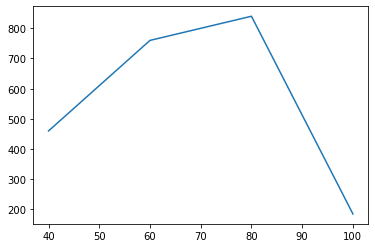

In [101]:
import matplotlib.pyplot as plt
plt.plot(listty,trials)
plt.show()